<a href="https://colab.research.google.com/github/Garik-ctrl/Z4088/blob/master/2025-04-07_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression

In [8]:
data = pd.read_csv("Advertising.csv", index_col=0)

In [9]:
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [15]:
X = data[["TV"]]
y = data["Sales"]

In [16]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [19]:
from IPython.display import display, Latex

beta0 = round(model.intercept_, 2)
beta1 = round(model.coef_[0], 2)

display(Latex(f'$y_i = \\beta_1 \cdot x_1 +\\beta_0= {beta1} \cdot x_1 + {beta0} $'))

<IPython.core.display.Latex object>

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

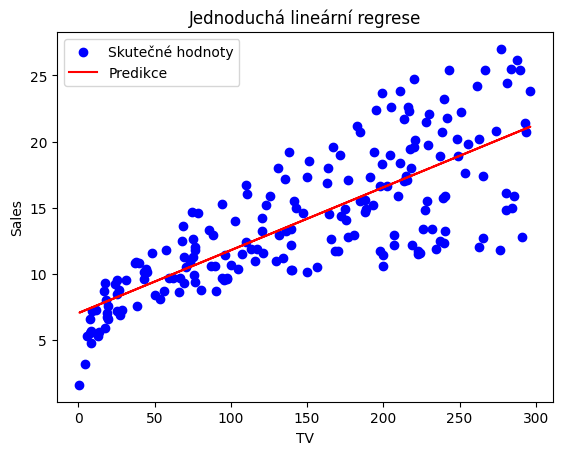

In [28]:
plt.scatter(X, y, color='blue', label='Skutečné hodnoty')
plt.plot(X, model.predict(X), color='red', label='Predikce')
plt.xlabel("TV")
plt.ylabel("Sales")
plt.legend()
plt.title("Jednoduchá lineární regrese")
plt.show()

In [33]:
from sklearn.metrics import mean_squared_error, r2_score

In [34]:
y_predict=model.predict(X)

In [36]:
MSE_1=mean_squared_error(y, y_predict)
R2_1=r2_score(y, y_predict)

In [37]:
print(f"MSE: {MSE_1}")
print(f"R2: {R2_1}")

MSE: 10.512652915656757
R2: 0.611875050850071


In [41]:
X_2 = data[["TV", "Radio", "Newspaper"]]

In [42]:
model.fit(X_2, y)

LinearRegression()

In [43]:
y_predict=model.predict(X_2)

In [44]:
MSE_2=mean_squared_error(y, y_predict)
R2_2=r2_score(y, y_predict)

In [46]:
print(f"MSE: {MSE_2}")
print(f"R2: {R2_2}")

MSE: 2.784126314510936
R2: 0.8972106381789522


In [47]:
data['TV x Radio'] = data['TV'] * data['Radio']
data['Radio x Newspaper'] = data['Newspaper'] * data['Radio']
data['Newspaper x TV'] = data['Newspaper'] * data['TV']
data["TV x Radio x Newspaper"]=data['TV'] * data['Radio'] * data['Newspaper']

In [48]:
data

,TV,Radio,Newspaper,Sales,TV x Radio,Radio x Newspaper,Newspaper x TV,TV x Radio x Newspaper
1,230.1,37.8,69.2,22.1,8697.78,2615.76,15922.92,601886.376
2,44.5,39.3,45.1,10.4,1748.85,1772.43,2006.95,78873.135
3,17.2,45.9,69.3,9.3,789.48,3180.87,1191.96,54710.964
4,151.5,41.3,58.5,18.5,6256.95,2416.05,8862.75,366031.575
5,180.8,10.8,58.4,12.9,1952.64,630.72,10558.72,114034.176
...,...,...,...,...,...,...,...,...
196,38.2,3.7,13.8,7.6,141.34,51.06,527.16,1950.492
197,94.2,4.9,8.1,9.7,461.58,39.69,763.02,3738.798
198,177.0,9.3,6.4,12.8,1646.10,59.52,1132.80,10535.040
199,283.6,42.0,66.2,25.5,11911.20,2780.40,18774.32,788521.440


In [59]:
X_3 = data[["TV", "Radio", "Newspaper","TV x Radio", "Radio x Newspaper",	"Newspaper x TV",	"TV x Radio x Newspaper"]]

In [50]:
model.fit(X_3, y)
y_predict=model.predict(X_3)
MSE_3=mean_squared_error(y, y_predict)
R2_3=r2_score(y, y_predict)
print(f"MSE: {MSE_3}")
print(f"R2: {R2_3}")

MSE: 0.8492985016239746
R2: 0.9686440767710514


In [52]:
model.coef_

array([ 1.97102957e-02,  1.96216027e-02,  1.31056550e-02,  1.16152251e-03,
        9.06294448e-06, -5.54550124e-05, -7.60995549e-07])

In [53]:
model.intercept_

np.float64(6.5558872747906785)

In [55]:
data["radio_squared"] = data["Radio"]**2
data["TV_squared"] = data["TV"] ** 2
data['Newspaper_squared'] = data['Newspaper'] ** 2

In [56]:
data

,TV,Radio,Newspaper,Sales,TV x Radio,Radio x Newspaper,Newspaper x TV,TV x Radio x Newspaper,radio_squared,TV_squared,Newspaper_squared
1,230.1,37.8,69.2,22.1,8697.78,2615.76,15922.92,601886.376,1428.84,52946.01,4788.64
2,44.5,39.3,45.1,10.4,1748.85,1772.43,2006.95,78873.135,1544.49,1980.25,2034.01
3,17.2,45.9,69.3,9.3,789.48,3180.87,1191.96,54710.964,2106.81,295.84,4802.49
4,151.5,41.3,58.5,18.5,6256.95,2416.05,8862.75,366031.575,1705.69,22952.25,3422.25
5,180.8,10.8,58.4,12.9,1952.64,630.72,10558.72,114034.176,116.64,32688.64,3410.56
...,...,...,...,...,...,...,...,...,...,...,...
196,38.2,3.7,13.8,7.6,141.34,51.06,527.16,1950.492,13.69,1459.24,190.44
197,94.2,4.9,8.1,9.7,461.58,39.69,763.02,3738.798,24.01,8873.64,65.61
198,177.0,9.3,6.4,12.8,1646.10,59.52,1132.80,10535.040,86.49,31329.00,40.96
199,283.6,42.0,66.2,25.5,11911.20,2780.40,18774.32,788521.440,1764.00,80428.96,4382.44


In [60]:
X_4 = data[["TV", "Radio", "Newspaper","radio_squared",	"TV_squared",	"Newspaper_squared"]]

In [61]:
model.fit(X_4, y)
y_predict=model.predict(X_4)
MSE_4=mean_squared_error(y, y_predict)
R2_4=r2_score(y, y_predict)
print(f"MSE: {MSE_4}")
print(f"R2: {R2_4}")

MSE: 2.2323266695937267
R2: 0.9175829657772006


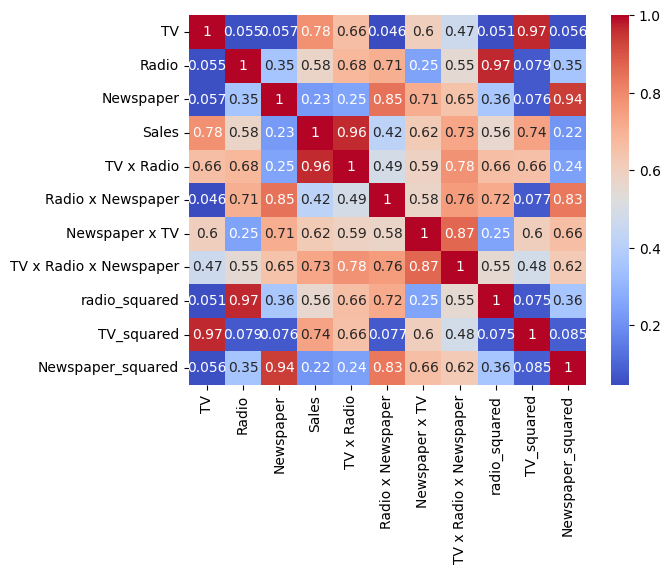

In [62]:
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.show()